### KNN Regressor 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix

In [2]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [3]:
# Load dataset
#dataset = pd.read_csv('../../featureSelectedDataset.csv')  
dataset = pd.read_csv('../../LassoRegression/LassoForwardSelectionDataSetForModelling.csv')

dataset.shape

(6259, 20)

In [4]:
# Split the dataset into features and obs
X = dataset.iloc[:,0:10]
y = dataset["Life expectancy at birth, total (years)"]

In [5]:
# Perform cross validation for n=3
from sklearn.model_selection import cross_val_score
# Fit the model
knn = KNeighborsRegressor(n_neighbors=3)
cv_scores = cross_val_score(knn, X.values, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.76484327 0.73738712 0.83028721 0.74219148 0.65209526 0.77821642
 0.81742226 0.83565128 0.82393234 0.84913603]
cv_scores mean:0.7831162671740566


In [6]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn_k = KNeighborsRegressor()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn_k, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X.values, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [7]:
#check top performing n_neighbors value
knn_gscv.best_params_['n_neighbors']

11

In [8]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.796854908513484

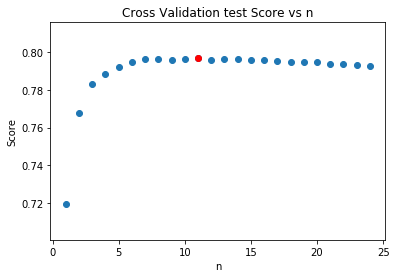

In [9]:
#import seaborn as sns # for Data visualization

scores = knn_gscv.cv_results_['mean_test_score']
x = np.array(range(1,len(scores)+1))
plt.scatter(x, scores)
#plt.figure(figsize=(8,5))
#sns.scatterplot(x=x,y=scores)
plt.title("Cross Validation test Score vs n")
plt.xlabel("n")
plt.ylabel("Score")
plt.scatter(x=knn_gscv.best_params_['n_neighbors'], y=knn_gscv.best_score_, color='r')
plt.show()